In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
import csv 


In [2]:
data1 = pd.read_csv("/Users/zhanissatayev/Downloads/D004 ПОСЛЕДНИЙ ВАРИАНТ/synthetic_kv_vopr1.csv")
data1.head(20)

,TE,K,KODNU,CELPOK,STOIMK,KVARTAL,PRIZ,GOD,NOMER,MESTPOK
0,61,2,5612004,1,8000,2,NaN,2024,58946,1.0
1,19,2,3123203,1,900,2,NaN,2020,45161,NaN
2,63,2,12130004,1,5000,1,NaN,2020,52815,NaN
3,75,1,12130007,1,540,4,NaN,2024,60164,NaN
4,39,2,9540011,1,1000,3,NaN,2021,56115,NaN
5,39,2,5611001,1,3000,1,NaN,2023,58419,NaN
6,19,1,12130001,1,8000,2,NaN,2020,45364,1.0
7,19,1,3212014,1,5000,3,NaN,2023,41472,1.0
8,63,1,5612004,1,3000,4,NaN,2022,2460,NaN
9,47,1,5611001,1,7500,1,NaN,2023,61115,1.0


In [3]:
data1.rename(columns = {'KODNU' : 'ID', 'CELPOK' : 'purpose', 'STOIMK' :
    'cost', 'KVARTAL' : 'quarter' , 'GOD' : 'year', 'MESTPOK' : 'place'},
            inplace= True)

In [4]:
def check_na(data):
    for i in data.columns:
        na_count = sum(data[i].isna()) / len(data[i]) * 100
        print(f"{i}: {na_count:.2f}%")

In [5]:
data1 = data1.drop(columns = ['PRIZ'])

In [6]:
purpose_map = {
    1 : 'personal',
    2 : 'gift',
    9 : 'other'
}
place_map = {
    1 : 'store',
    2 : 'supermarket',
    3 : 'market',
    4 : 'internet',
    9: 'other'
}

In [7]:
item_df = pd.read_csv("/Users/zhanissatayev/Desktop/D003.csv")


In [8]:
data1.columns

Index(['TE', 'K', 'ID', 'purpose', 'cost', 'quarter', 'year', 'NOMER',
       'place'],
      dtype='object')

In [10]:
item_df.rename(columns = {'Код' : 'ID'}, inplace = True)
item_df = item_df.drop(columns=['Наименование на английском',])
item_df.columns


Index(['Item_ID', 'ID', 'Наименование', 'Полное наименование',
       'ID классификации'],
      dtype='object')

In [11]:
data1_names = data1.merge(item_df[['ID', 'Наименование']], on = 'ID',
                        how = "left")

In [12]:
check_na(data1_names)

TE: 0.00%
K: 0.00%
ID: 0.00%
purpose: 0.00%
cost: 0.00%
quarter: 0.00%
year: 0.00%
NOMER: 0.00%
place: 60.09%
Наименование: 35.86%


In [ ]:
data1_names = data1_names.drop(columns= ['place'])
data1_names = data1_names.dropna()
print(f"\nAfter dropping NA's : {data1_names.shape}")

The original shape is :          TE  K        ID  purpose  cost  quarter  year  NOMER  place  \
0        61  2   5612004        1  8000        2  2024  58946    1.0   
1        61  2   5612004        1  8000        2  2024  58946    1.0   
2        19  2   3123203        1   900        2  2020  45161    NaN   
3        63  2  12130004        1  5000        1  2020  52815    NaN   
4        75  1  12130007        1   540        4  2024  60164    NaN   
...      .. ..       ...      ...   ...      ...   ...    ...    ...   
6279520  59  2  12130001        1  3000        1  2021  51659    1.0   
6279521  59  2  12130001        1  3000        1  2021  51659    1.0   
6279522  39  2  12130012        1  1770        4  2024  63460    1.0   
6279523  61  2  12130015        1  3000        1  2024  66175    1.0   
6279524  47  2   3211002        1  4000        2  2024  55166    2.0   

                                      Наименование  
0        Тряпочки и губки для мытья посуды, уборки  
1    

In [15]:
check_na(data1_names)

TE: 0.00%
K: 0.00%
ID: 0.00%
purpose: 0.00%
cost: 0.00%
quarter: 0.00%
year: 0.00%
NOMER: 0.00%
Наименование: 0.00%


In [16]:
print("Sample item_ids from df1:", data1['ID'].head().tolist())
print("Sample item_ids from df2:", item_df['ID'].head().tolist())

# Check overlap
common = set(data1['ID']) & set(item_df['ID'])
print(f"Matching IDs: {len(common)}")

Sample item_ids from df1: [5612004, 3123203, 12130004, 12130007, 9540011]
Sample item_ids from df2: [12300, 12600, 12719099, 1141307, 1141399]
Matching IDs: 265


In [23]:
data1_names.shape

(4027400, 9)

In [ ]:
data2 = pd.read_csv('/Users/zhanissatayev/Downloads/D004 ПОСЛЕДНИЙ ВАРИАНТ/synthetic_kv_vopr2.csv')

In [ ]:
data2.head(20)

In [ ]:
data2.rename(columns = {'KODNU' : 'ID', 'CELPOK' : 'purpose', 'STOIMK' :
    'cost', 'KVARTAL' : 'quarter' , 'GOD' : 'year', 'MESTPOK' : 'place'},
            inplace= True)

In [ ]:
data2_names = data2.merge(item_df[['ID', 'Наименование']], on = 'ID', how = 'left')

In [ ]:
check_na(data2_names)

In [ ]:
data2_names = data2_names.drop(columns = ['TIME'])

In [25]:
data11 = pd.read_csv("/Users/zhanissatayev/Downloads/D004 ПОСЛЕДНИЙ ВАРИАНТ/synthetic_kv_vopr11.csv")

In [26]:
data11.head(20)

,TE,K,NOMP,VOZ,POL,NOMVOPR,NOMVNEW,GR1,GR2,GR3,...,GR17,GR18,GR19,GR20,GR21,GR22,GR23,KVARTAL,GOD,NOMER
0,63,1,1,50,1,111,300,0,0,0,...,0,0,0,0,0,15525,0,3,2024,61636
1,43,2,1,26,1,111,300,210000,0,0,...,0,0,0,0,0,14768,0,3,2024,62874
2,27,2,1,57,1,111,300,660000,0,0,...,0,0,0,0,0,9543,0,2,2020,56237
3,61,2,2,47,1,111,300,0,0,0,...,0,0,0,0,0,0,0,1,2020,44964
4,71,2,3,67,2,111,300,840000,0,23100,...,0,0,0,0,0,0,0,1,2022,24255
5,15,2,2,51,2,111,300,420000,0,0,...,0,0,0,0,0,0,0,4,2022,43446
6,47,1,1,42,2,111,300,0,0,0,...,0,0,0,0,0,13157,0,3,2024,63019
7,19,1,1,40,2,111,300,0,0,0,...,0,0,0,0,0,0,0,4,2020,49612
8,59,1,2,66,2,111,300,0,0,0,...,0,0,0,0,0,11969,0,2,2022,55829
9,39,1,2,35,1,111,300,330000,0,0,...,0,0,0,0,0,21002,0,2,2021,50715


In [27]:
data11 = data11.drop(columns = ['NOMVOPR', 'NOMVNEW'])

In [29]:
data11.rename(columns = {'NOMP' : 'person', 'VOZ' : 'age',
                'KVARTAL' : 'quarter' , 'GOD' : 'year',} ,inplace= True)

In [31]:
question_columns = []
for i in range(1,24):
    question_columns.append(f'GR{i}')

In [ ]:
data11['total_income'] = data11[question_columns].sum(axis =1)

In [44]:
import matplotlib.pyplot as plt

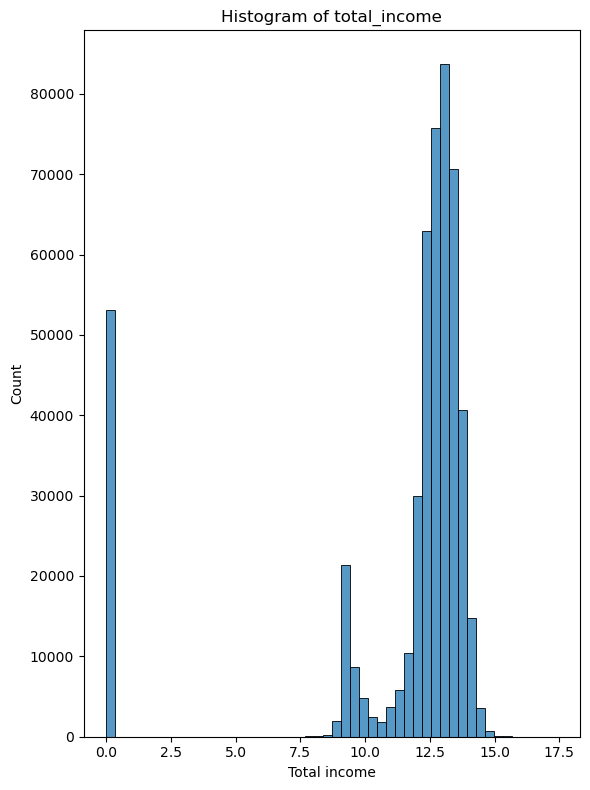

In [ ]:
fig = plt.figure(figsize = (6,8))
sns.histplot(np.log1p(data11['total_income']), bins=50, stat='count')
plt.xlabel('Total income')
plt.ylabel('Count')
plt.title('Histogram of total_income (log 1p transformed)')
plt.tight_layout()
plt.show()


In [47]:
for i in range(2020,2025):
    print(f"The average income for year {i} was {data11[data11['year'] == i]['total_income'].mean()}")

The average income for year 2020 was 388374.79154375615
The average income for year 2021 was 402564.1439214155
The average income for year 2022 was 406532.90255589446
The average income for year 2023 was 415121.86692259763
The average income for year 2024 was 427697.65247800335


In [ ]:
unique_people = []
for i in data11['NOMER'].unique():
    unique_people.append(data11[data11['NOMER'] == i ]['person'].nunique())
np.median(unique_people)

4.0

In [ ]:
data11.shape

In [51]:
(len(data11[data11['GR5'] > 0]))/len(data11['GR4'])*100

2.3074387209082614

In [52]:
count_both_payments = ((data11['GR5'] > 0) & (data11['GR4'] > 0)).sum()
print(f"Proporton of people receiving university scholarship AND pension at the same time is: {100*count_both_payments/len(data11):.2f}%")

Proporton of people receiving university scholarship AND pension at the same time is: 0.51%


In [53]:
data11.rename(columns= {'POL': 'sex'}, inplace = True)

In [55]:
data11.head(5)

,TE,K,person,age,sex,GR1,GR2,GR3,GR4,GR5,...,GR18,GR19,GR20,GR21,GR22,GR23,quarter,year,NOMER,total_income
0,63,1,1,50,1,0,0,0,0,0,...,0,0,0,0,15525,0,3,2024,61636,15525
1,43,2,1,26,1,210000,0,0,0,0,...,0,0,0,0,14768,0,3,2024,62874,365048
2,27,2,1,57,1,660000,0,0,0,0,...,0,0,0,0,9543,0,2,2020,56237,669543
3,61,2,2,47,1,0,0,0,0,0,...,0,0,0,0,0,0,1,2020,44964,68000
4,71,2,3,67,2,840000,0,23100,0,0,...,0,0,0,0,0,0,1,2022,24255,919170


In [58]:
data11[data11['NOMER'] == 61636].head(20)

,TE,K,person,age,sex,GR1,GR2,GR3,GR4,GR5,...,GR18,GR19,GR20,GR21,GR22,GR23,quarter,year,NOMER,total_income
0,63,1,1,50,1,0,0,0,0,0,...,0,0,0,0,15525,0,3,2024,61636,15525
17060,47,2,1,45,2,300000,0,0,352218,0,...,0,0,0,0,9241,0,2,2024,61636,661459
84639,27,2,2,55,2,0,0,0,0,0,...,0,0,0,0,0,0,1,2021,61636,0
114879,19,1,1,62,1,0,0,0,0,0,...,0,0,0,0,0,0,2,2022,61636,120000
116036,27,2,2,65,2,240000,0,0,0,0,...,0,0,0,0,9241,0,2,2024,61636,249241
122413,31,2,1,61,2,540000,0,0,0,0,...,0,0,0,0,0,0,3,2023,61636,625000
133032,43,2,1,69,2,285000,0,0,0,0,...,0,0,0,0,11600,0,2,2022,61636,296600
217079,75,1,1,40,2,237000,0,0,0,0,...,0,0,0,0,11027,0,1,2024,61636,248027
248293,31,2,2,91,2,0,0,0,0,0,...,0,0,0,0,0,0,2,2024,61636,0
344927,55,2,1,66,1,210000,0,0,0,0,...,0,0,0,0,11578,0,1,2023,61636,221578


In [66]:
cols_to_sum = [f"GR{i}" for i in range (1,24)]
cols_to_sum.append('total_income')
data11_sum = (
    data11.groupby(['NOMER', 'year', 'quarter'], as_index=False)[cols_to_sum].sum()
)
data11_sum.head(20)

,NOMER,year,quarter,GR1,GR2,GR3,GR4,GR5,GR6,GR7,...,GR15,GR16,GR17,GR18,GR19,GR20,GR21,GR22,GR23,total_income
0,15,2022,2,300000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12420,0,312420
1,15,2023,1,510000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11696,0,521696
2,15,2023,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20240,0,20240
3,15,2024,2,150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10501,0,160501
4,15,2024,3,810000,255000,0,660000,0,0,0,...,0,0,0,0,0,0,0,0,0,1890000
5,15,2024,4,300000,0,0,230000,0,0,0,...,0,0,0,0,0,0,0,10001,0,540001
6,36,2020,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,36,2020,3,0,0,0,339000,0,0,0,...,0,0,0,0,0,0,0,10917,0,349917
8,36,2022,4,300000,0,0,227760,0,0,0,...,0,0,0,0,0,0,0,0,0,527760
9,36,2023,2,300000,63000,0,185388,0,0,0,...,0,0,0,0,0,0,0,9241,0,557629


In [ ]:
data11_sum[data11_sum['NOMER'] == 61636].head(20)

,NOMER,year,quarter,GR1,GR2,GR3,GR4,GR5,GR6,GR7,...,GR15,GR16,GR17,GR18,GR19,GR20,GR21,GR22,GR23,total_income
217108,61636,2021,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217109,61636,2022,2,285000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11600,0,416600
217110,61636,2023,1,210000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11578,0,221578
217111,61636,2023,3,540000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,625000
217112,61636,2024,1,237000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11027,0,248027
217113,61636,2024,2,540000,0,0,352218,0,0,0,...,0,0,0,0,0,0,0,18482,0,910700
217114,61636,2024,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15525,0,15525


In [87]:
263077/20

13153.85

In [69]:
data11_sum['quarter_id'] = data11['year']*4 + data11['quarter']

In [72]:
quarter_averages = {}
for i in data11_sum['quarter_id'].unique():
    quarter_averages.update({i : data11_sum[data11_sum['quarter_id'] == i]['total_income'].mean()})


In [77]:
quarter_df = pd.DataFrame(list(quarter_averages.items()), columns=['quarter_id', 'avg_income'])
quarter_df.head()

,quarter_id,avg_income
0,8099,756763.094779
1,8082,779061.863024
2,8081,766367.379462
3,8089,776536.692208
4,8092,768204.051862


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import linregress


In [79]:
quarter_df = quarter_df.sort_values('quarter_id')


In [ ]:
quarter_df['year'] = (quarter_df['quarter_id'] // 4).astype(int)
quarter_df['quarter'] = (quarter_df['quarter_id'] % 4).replace(0, 4)


In [82]:
quarter_df

,quarter_id,avg_income,year,quarter
2,8081,766367.379462,2020,1
1,8082,779061.863024,2020,2
12,8083,776371.246162,2020,3
5,8084,777738.187175,2021,4
9,8085,781176.569299,2021,1
7,8086,771873.046568,2021,2
16,8087,769518.271931,2021,3
8,8088,770232.040892,2022,4
3,8089,776536.692208,2022,1
6,8090,775756.598887,2022,2


In [83]:
quarter_df['date'] = pd.PeriodIndex(year=quarter_df['year'], quarter=quarter_df['quarter']).to_timestamp()


/var/folders/bf/ph8zbb_15td2csjbjg3c188h0000gn/T/ipykernel_9694/3219037651.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  quarter_df['date'] = pd.PeriodIndex(year=quarter_df['year'], quarter=quarter_df['quarter']).to_timestamp()


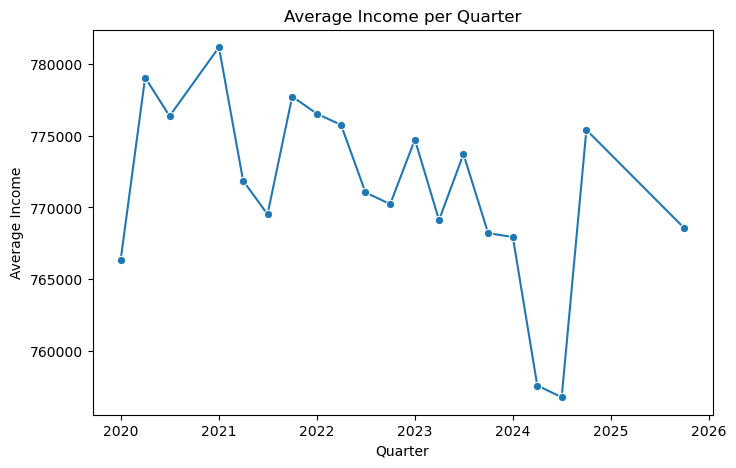

In [84]:
plt.figure(figsize=(8,5))
sns.lineplot(data=quarter_df, x='date', y='avg_income', marker='o')
plt.title('Average Income per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Income')
plt.show()

In [85]:
data11_sum.to_csv("/Users/zhanissatayev/data11.csv")

In [94]:
data11[data11['year'] == 2020]['total_income'].mean()
data11[data11['year'] == 2021]['total_income'].mean()
data11[data11['year'] == 2022]['total_income'].mean()



406532.90255589446

In [95]:
data11.head(50)

,TE,K,person,age,sex,GR1,GR2,GR3,GR4,GR5,...,GR18,GR19,GR20,GR21,GR22,GR23,quarter,year,NOMER,total_income
0,63,1,1,50,1,0,0,0,0,0,...,0,0,0,0,15525,0,3,2024,61636,15525
1,43,2,1,26,1,210000,0,0,0,0,...,0,0,0,0,14768,0,3,2024,62874,365048
2,27,2,1,57,1,660000,0,0,0,0,...,0,0,0,0,9543,0,2,2020,56237,669543
3,61,2,2,47,1,0,0,0,0,0,...,0,0,0,0,0,0,1,2020,44964,68000
4,71,2,3,67,2,840000,0,23100,0,0,...,0,0,0,0,0,0,1,2022,24255,919170
5,15,2,2,51,2,420000,0,0,435000,0,...,0,0,0,0,0,0,4,2022,43446,855000
6,47,1,1,42,2,0,0,0,0,0,...,0,0,0,0,13157,0,3,2024,63019,13157
7,19,1,1,40,2,0,0,0,0,0,...,0,0,0,0,0,0,4,2020,49612,0
8,59,1,2,66,2,0,0,0,0,0,...,0,0,0,0,11969,0,2,2022,55829,11969
9,39,1,2,35,1,330000,0,0,0,0,...,0,0,0,0,21002,0,2,2021,50715,351002


In [97]:
data11 = data11.sort_values(['NOMER', 'year', 'quarter'])


In [98]:
data11.head(20)

,TE,K,person,age,sex,GR1,GR2,GR3,GR4,GR5,...,GR18,GR19,GR20,GR21,GR22,GR23,quarter,year,NOMER,total_income
165665,33,1,3,31,2,300000,0,0,0,0,...,0,0,0,0,12420,0,2,2022,15,312420
420060,27,2,1,49,1,510000,0,0,0,0,...,0,0,0,0,11696,0,1,2023,15,521696
73356,62,2,1,60,2,0,0,0,0,0,...,0,0,0,0,20240,0,4,2023,15,20240
108966,33,1,2,65,2,150000,0,0,0,0,...,0,0,0,0,10501,0,2,2024,15,160501
91298,55,1,2,78,1,0,255000,0,144000,0,...,0,0,0,0,0,0,3,2024,15,399000
241395,79,1,1,37,2,210000,0,0,288000,0,...,0,0,0,0,0,0,3,2024,15,663000
482278,62,1,1,75,2,600000,0,0,228000,0,...,0,0,0,0,0,0,3,2024,15,828000
180973,75,2,1,71,2,300000,0,0,230000,0,...,0,0,0,0,10001,0,4,2024,15,540001
442008,43,1,2,54,2,0,0,0,0,0,...,0,0,0,0,0,0,2,2020,36,0
224451,79,2,1,34,2,0,0,0,339000,0,...,0,0,0,0,10917,0,3,2020,36,349917


In [105]:
dupes = data11.duplicated(subset=['NOMER', 'year', 'quarter'], keep=False)
print(f"Total duplicate rows: {dupes.sum()}")

Total duplicate rows: 359072


In [106]:
data11[dupes].sort_values(['NOMER', 'year', 'quarter']).head(10)


,TE,K,person,age,sex,GR1,GR2,GR3,GR4,GR5,...,GR18,GR19,GR20,GR21,GR22,GR23,quarter,year,NOMER,total_income
91298,55,1,2,78,1,0,255000,0,144000,0,...,0,0,0,0,0,0,3,2024,15,399000
241395,79,1,1,37,2,210000,0,0,288000,0,...,0,0,0,0,0,0,3,2024,15,663000
482278,62,1,1,75,2,600000,0,0,228000,0,...,0,0,0,0,0,0,3,2024,15,828000
163216,79,2,1,67,2,0,0,0,227760,0,...,0,0,0,0,0,0,4,2022,36,227760
194663,59,2,2,68,1,300000,0,0,0,0,...,0,0,0,0,0,0,4,2022,36,300000
70252,11,2,1,53,1,300000,0,0,0,0,...,0,0,0,0,14768,0,3,2023,48,314768
210555,79,1,3,50,1,270000,60000,0,0,0,...,0,0,0,0,10000,0,3,2023,48,340000
139770,47,2,2,77,1,0,0,0,0,0,...,0,0,0,0,0,0,2,2024,48,0
354038,61,2,4,49,1,390000,0,0,390000,0,...,0,0,0,0,0,0,2,2024,48,780000
87092,27,2,2,61,2,372000,0,0,0,0,...,0,0,0,0,0,60008,1,2020,100,432008


In [107]:
data11_unique = data11.drop_duplicates(subset=['NOMER', 'year', 'quarter'], keep='first')


In [108]:
data11_unique.shape

(263077, 32)

In [111]:
data11_unique = data11_unique.sort_values(['NOMER', 'year', 'quarter'])
data11_unique.head(30)

,TE,K,person,age,sex,GR1,GR2,GR3,GR4,GR5,...,GR18,GR19,GR20,GR21,GR22,GR23,quarter,year,NOMER,total_income
165665,33,1,3,31,2,300000,0,0,0,0,...,0,0,0,0,12420,0,2,2022,15,312420
420060,27,2,1,49,1,510000,0,0,0,0,...,0,0,0,0,11696,0,1,2023,15,521696
73356,62,2,1,60,2,0,0,0,0,0,...,0,0,0,0,20240,0,4,2023,15,20240
108966,33,1,2,65,2,150000,0,0,0,0,...,0,0,0,0,10501,0,2,2024,15,160501
91298,55,1,2,78,1,0,255000,0,144000,0,...,0,0,0,0,0,0,3,2024,15,399000
180973,75,2,1,71,2,300000,0,0,230000,0,...,0,0,0,0,10001,0,4,2024,15,540001
442008,43,1,2,54,2,0,0,0,0,0,...,0,0,0,0,0,0,2,2020,36,0
224451,79,2,1,34,2,0,0,0,339000,0,...,0,0,0,0,10917,0,3,2020,36,349917
163216,79,2,1,67,2,0,0,0,227760,0,...,0,0,0,0,0,0,4,2022,36,227760
312926,71,2,1,40,1,300000,63000,0,185388,0,...,0,0,0,0,9241,0,2,2023,36,557629


In [127]:
quarterly_avg = (
    data11_unique
    .groupby(['year', 'quarter'], as_index=False)
    .agg(
        avg_income=('total_income', 'mean'),
        share_GR4=('GR4', lambda x: (x > 0).mean()),
        share_GR23=('GR23', lambda x: (x > 0).mean())
    )
)

In [128]:
quarterly_avg['date'] = (
    quarterly_avg['year'].astype(str) + 'Q' + quarterly_avg['quarter'].astype(str)
)
quarterly_avg['date'] = pd.PeriodIndex(quarterly_avg['date'], freq='Q').to_timestamp()

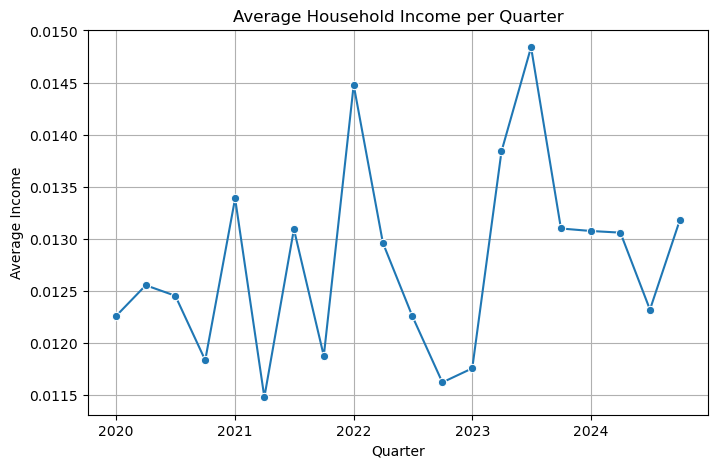

In [129]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=quarterly_avg.sort_values(['year','quarter']),
    x='date', y='share_GR23', marker='o'
)
plt.title('Average Household Income per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

In [132]:
gr_cols = [c for c in data11_unique.columns if c.startswith('GR')]
features_cols = gr_cols + ['total_income']

# yearly household features
yearly_households = (
    data11_unique
    .groupby(['NOMER', 'year'], as_index=False)[features_cols]
    .mean()
)

In [147]:
from joblib import Parallel, delayed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def _score_k_on_splits(X, k, n_splits=5, random_state=0, n_init=10):
    """
    Fit KMeans on train folds and compute silhouette on val folds.
    Returns mean silhouette across folds (or -1 if invalid).
    Note: X is the preprocessed feature matrix for the group/year.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        # Fit KMeans on train
        km = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
        km.fit(X_train)
        # Predict on val and score
        labels = km.predict(X_val)
        if len(np.unique(labels)) > 1:
            sc = silhouette_score(X_val, labels)
            scores.append(sc)
    if len(scores) == 0:
        return -1.0
    return float(np.mean(scores))


def parallel_k_search(
    X, 
    ks=range(2,13), 
    n_splits=5, 
    n_jobs=-1,             # number of parallel jobs for joblib
    random_state=0,
    pca_components=None,   # int or None
    n_init=10
):
    """
    Run parallel search over ks (list or range), return DataFrame with mean silhouette per k,
    and return best_k.
    X: raw feature matrix (n_samples, n_features) - will be filledna(0) if contains NaNs.
    """
    # preprocess: fillna, scale, optional PCA
    X = np.asarray(X)
    # ensure numeric and no NaNs
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    scaler = StandardScaler().fit(X)
    Xs = scaler.transform(X)
    if pca_components is not None:
        pca = PCA(n_components=min(pca_components, Xs.shape[1], Xs.shape[0]-1), random_state=random_state)
        Xp = pca.fit_transform(Xs)
    else:
        pca = None
        Xp = Xs

    # inner function for joblib
    def _task(k):
        # set env inside each worker as safety
        sc = _score_k_on_splits(Xp, k, n_splits=n_splits, random_state=random_state, n_init=n_init)
        return {'k': int(k), 'silhouette': sc}

    # run in parallel across ks
    results = Parallel(n_jobs=n_jobs, prefer="threads")(
        delayed(_task)(k) for k in ks
    )

    results_df = pd.DataFrame(results).sort_values('k').reset_index(drop=True)
    # pick best k by silhouette (higher is better). If ties, pick smallest k.
    best_row = results_df.loc[results_df['silhouette'].idxmax()]
    best_k = int(best_row['k'])
    # refit final KMeans on full (preprocessed) dataset with best_k
    final_km = KMeans(n_clusters=best_k, random_state=random_state, n_init=n_init).fit(Xp)
    return {
        'results_df': results_df,
        'best_k': best_k,
        'best_silhouette': float(best_row['silhouette']),
        'scaler': scaler,
        'pca': pca,
        'X_preprocessed': Xp,
        'final_kmeans': final_km
    }


def run_search_per_year(
    df,                     # dataframe containing features + 'year' + 'NOMER'
    feature_cols, 
    years=None, 
    ks=range(2,13),
    n_splits=5,
    n_jobs=-1,
    random_state=0,
    pca_components=None,
    n_init=10
):
    """
    Run parallel_k_search for each year. Returns dict: year -> search outputs and a combined summary DataFrame.
    """
    outputs = {}
    years_list = sorted(df['year'].unique()) if years is None else sorted(years)
    summary_rows = []
    for yr in years_list:
        sub = df[df['year'] == yr]
        if sub.shape[0] < 2:
            # skip tiny years
            print(f"Skipping year {yr}: too few samples ({sub.shape[0]})")
            continue
        X = sub[feature_cols].fillna(0).values
        print(f"Searching year {yr}: {X.shape[0]} samples, {X.shape[1]} features ...")
        out = parallel_k_search(
            X, ks=ks, n_splits=n_splits, n_jobs=n_jobs, random_state=random_state,
            pca_components=pca_components, n_init=n_init
        )
        outputs[yr] = out
        summary_rows.append({'year': yr, 'best_k': out['best_k'], 'best_silhouette': out['best_silhouette']})
    summary_df = pd.DataFrame(summary_rows).sort_values('year').reset_index(drop=True)
    return outputs, summary_df


In [148]:
# feature selection (adjust if your column names differ)
gr_cols = [c for c in data11_unique.columns if c.startswith('GR')]
feature_cols = gr_cols + ['total_income']

# run on whole dataset (no per-year split)
out_all = parallel_k_search(
    data11_unique[feature_cols].fillna(0).values,   
    ks=range(2,13),
    n_splits=5,
    n_jobs=-1,              # set to -1 to use all cores, or 8 to limit
    pca_components=20,      # optional: speed up by reducing dims
    random_state=42,
    n_init=10
)
print("Best k (global):", out_all['best_k'])
print(out_all['results_df'])

# --- OR run per-year ---
outputs_by_year, summary_df = run_search_per_year(
    data11_unique,
    feature_cols=feature_cols,
    ks=range(2,13),
    n_splits=5,
    n_jobs=-1,
    pca_components=20,
    random_state=42,
    n_init=10
)
print(summary_df)


Best k (global): 7
     k  silhouette
0    2    0.337792
1    3    0.341358
2    4    0.327158
3    5    0.305744
4    6    0.319856
5    7    0.361288
6    8    0.319573
7    9    0.301214
8   10    0.307309
9   11    0.317917
10  12    0.329786
Searching year 2020: 45948 samples, 24 features ...
Searching year 2021: 53610 samples, 24 features ...
Searching year 2022: 55573 samples, 24 features ...
Searching year 2023: 55809 samples, 24 features ...
Searching year 2024: 52137 samples, 24 features ...
   year  best_k  best_silhouette
0  2020       5         0.560928
1  2021       4         0.468597
2  2022       2         0.485629
3  2023       2         0.322641
4  2024       4         0.427051


In [149]:
summary_df

,year,best_k,best_silhouette
0,2020,5,0.560928
1,2021,4,0.468597
2,2022,2,0.485629
3,2023,2,0.322641
4,2024,4,0.427051


In [155]:
cluster_outputs = {}

for yr, row in summary_df.iterrows():
    year = int(row['year'])
    best_k = int(row['best_k'])

    # Always subset first
    sub = data11_unique[data11_unique['year'] == year].copy()

    # Make sure X matches sub exactly
    X = np.log1p(sub[feature_cols].fillna(0).values)

    # Scale & PCA within this subset
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    pca = PCA(n_components=2, random_state=42)
    Xp = pca.fit_transform(Xs)

    km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    labels = km.fit_predict(Xp)

    # Ensure same length
    assert len(labels) == len(sub), f"Year {year}: {len(labels)} != {len(sub)}"

    # Assign
    sub['cluster'] = labels

    cluster_outputs[year] = {
        'data': sub,
        'Xp': Xp,
        'kmeans': km,
        'pca': pca,
        'scaler': scaler
    }


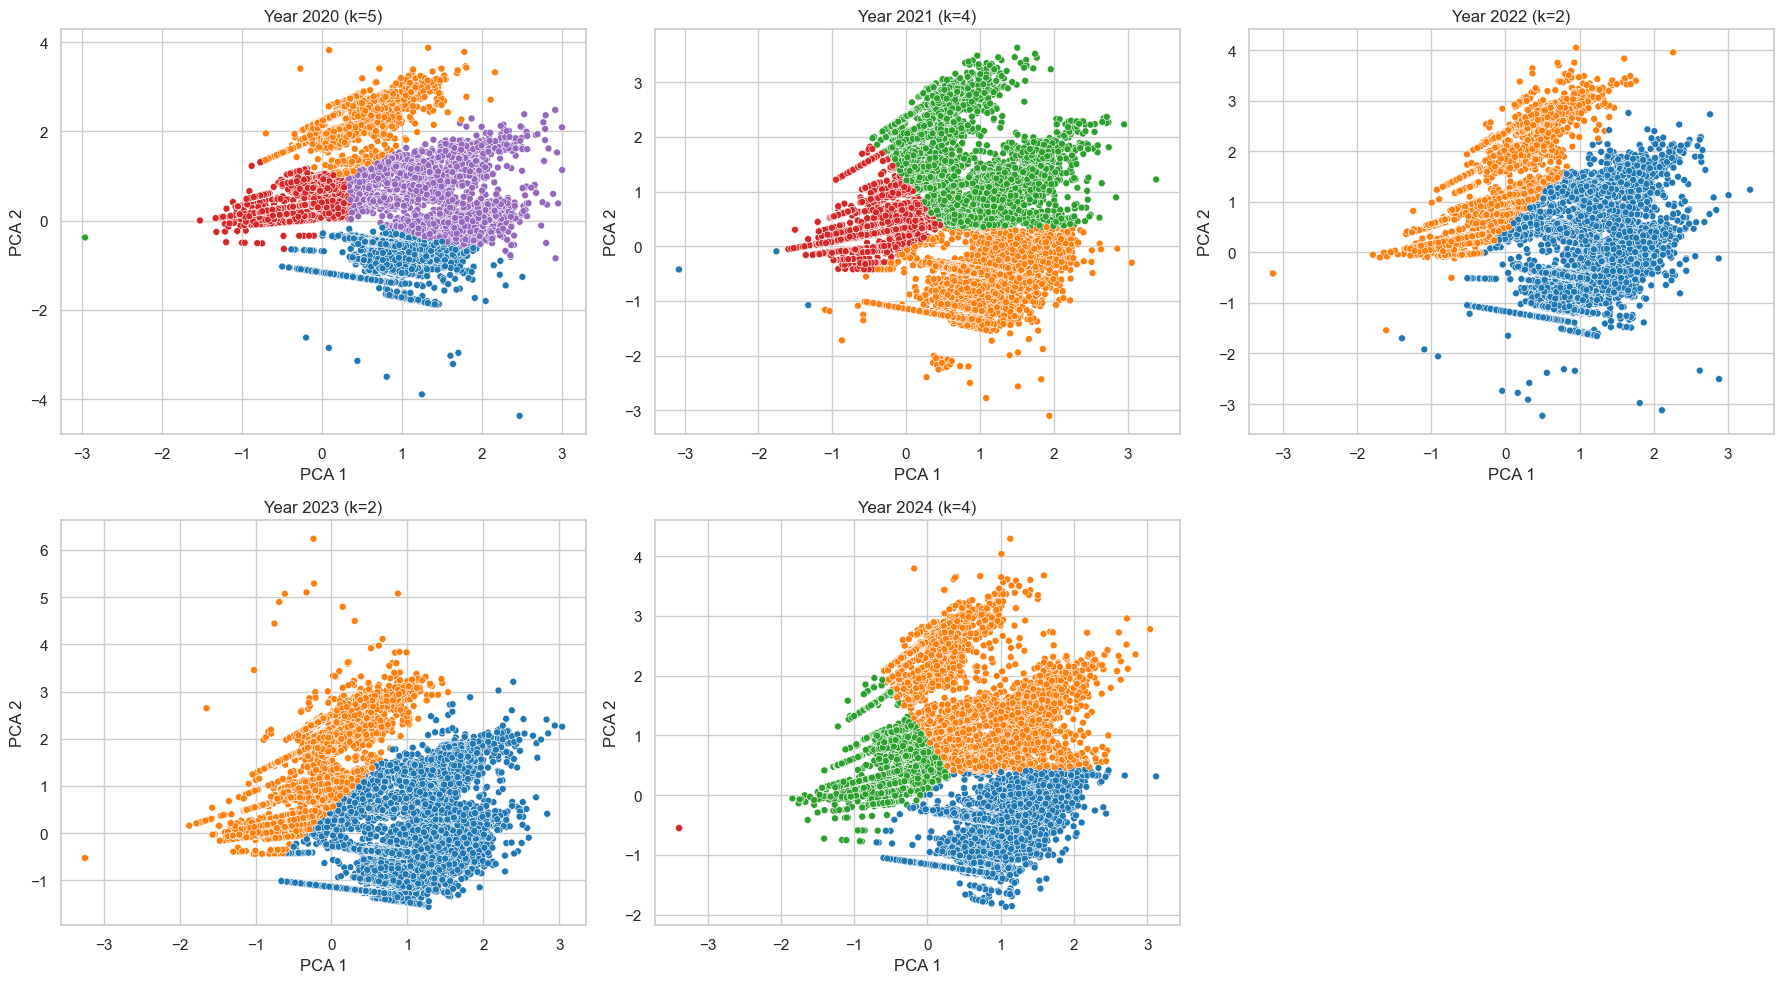

In [156]:
def plot_clusters_per_year(cluster_outputs):
    n_years = len(cluster_outputs)
    ncols = 3
    nrows = int(np.ceil(n_years / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
    axes = axes.flatten()

    for i, (year, out) in enumerate(sorted(cluster_outputs.items())):
        sub = out['data']
        Xp = out['Xp']
        labels = sub['cluster']

        ax = axes[i]
        sns.scatterplot(
            x=Xp[:, 0],
            y=Xp[:, 1],
            hue=labels,
            palette='tab10',
            s=25,
            ax=ax,
            legend=False
        )
        ax.set_title(f"Year {year} (k={out['kmeans'].n_clusters})")
        ax.set_xlabel("PCA 1")
        ax.set_ylabel("PCA 2")

    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_clusters_per_year(cluster_outputs)

In [161]:
data11_unique.head(20)

,TE,K,person,age,sex,GR1,GR2,GR3,GR4,GR5,...,GR18,GR19,GR20,GR21,GR22,GR23,quarter,year,NOMER,total_income
165665,33,1,3,31,2,300000,0,0,0,0,...,0,0,0,0,12420,0,2,2022,15,312420
420060,27,2,1,49,1,510000,0,0,0,0,...,0,0,0,0,11696,0,1,2023,15,521696
73356,62,2,1,60,2,0,0,0,0,0,...,0,0,0,0,20240,0,4,2023,15,20240
108966,33,1,2,65,2,150000,0,0,0,0,...,0,0,0,0,10501,0,2,2024,15,160501
91298,55,1,2,78,1,0,255000,0,144000,0,...,0,0,0,0,0,0,3,2024,15,399000
180973,75,2,1,71,2,300000,0,0,230000,0,...,0,0,0,0,10001,0,4,2024,15,540001
442008,43,1,2,54,2,0,0,0,0,0,...,0,0,0,0,0,0,2,2020,36,0
224451,79,2,1,34,2,0,0,0,339000,0,...,0,0,0,0,10917,0,3,2020,36,349917
163216,79,2,1,67,2,0,0,0,227760,0,...,0,0,0,0,0,0,4,2022,36,227760
312926,71,2,1,40,1,300000,63000,0,185388,0,...,0,0,0,0,9241,0,2,2023,36,557629


In [180]:
print(data11_unique.shape)
print(263077/4/5)

(263077, 32)
13153.85


In [182]:
print(data11.shape)
print(497478/4/5)

(497478, 32)
24873.9


Aggregating quarter-level rows to household-year (SUM)...
household_year shape: (108169, 26)

Processing year 2020, rows: 18747
  Evaluating ks: [2, 3, 4, 5, 6, 7, 8, 9]
  Best k = 2 (silhouette=0.2859)

Processing year 2021, rows: 22011
  Evaluating ks: [2, 3, 4, 5, 6, 7, 8, 9]
  Best k = 8 (silhouette=0.2768)

Processing year 2022, rows: 23173
  Evaluating ks: [2, 3, 4, 5, 6, 7, 8, 9]
  Best k = 3 (silhouette=0.2601)

Processing year 2023, rows: 23252
  Evaluating ks: [2, 3, 4, 5, 6, 7, 8, 9]
  Best k = 6 (silhouette=0.2749)

Processing year 2024, rows: 20986
  Evaluating ks: [2, 3, 4, 5, 6, 7, 8, 9]
  Best k = 6 (silhouette=0.2736)

Summary per year:
   year  best_k  best_silhouette  n_samples
0  2020       2         0.285905      18747
1  2021       8         0.276801      22011
2  2022       3         0.260069      23173
3  2023       6         0.274931      23252
4  2024       6         0.273635      20986


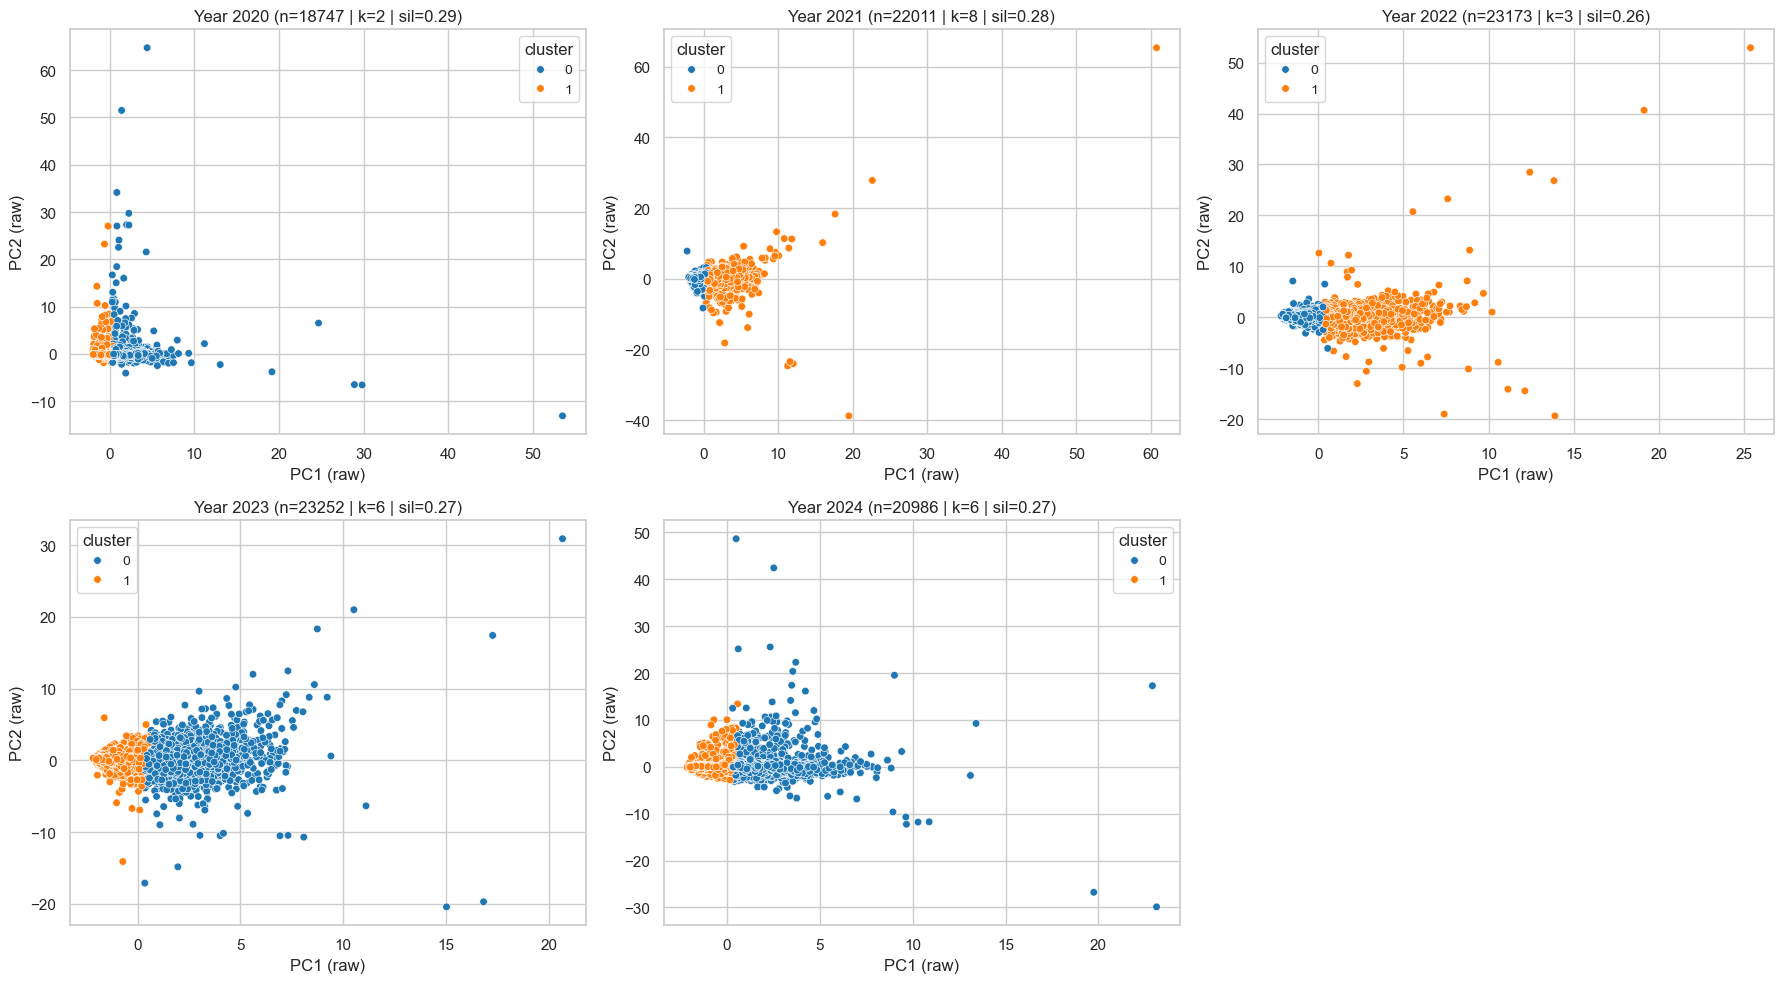

Done. Variables available: outputs_by_year, summary_df, household_year_with_clusters


In [203]:

# -----------------------------
# CONFIG - edit if needed
# -----------------------------
src_df = data11_unique         # your quarter-level df (one row per household-quarter)
household_id_col = 'NOMER'
year_col = 'year'

# auto-detect feature columns (GR* and total_income)
feature_cols = [c for c in src_df.columns if c.startswith('GR')]
if 'total_income' in src_df.columns:
    feature_cols.append('total_income')

ks = list(range(2, 10))    # candidate k values
n_splits = 5               # KFold splits
n_init = 100               # KMeans n_init
n_jobs = -1                # parallel jobs for joblib
random_state = 42

# -----------------------------
# 1) Aggregate quarter -> household-year (SUM)
# -----------------------------
print("Aggregating quarter-level rows to household-year (SUM)...")
agg_dict = {c: 'sum' for c in feature_cols}   # <-- SUM aggregation now
household_year = (
    src_df
    .groupby([household_id_col, year_col], as_index=False)
    .agg(agg_dict)
)
print("household_year shape:", household_year.shape)

df = household_year.copy()

# -----------------------------
# helper: silhouette scoring on scaled raw X
# -----------------------------
def _score_k_on_scaled_raw(Xs_raw, k, n_splits=5, random_state=42, n_init=10):
    n_samples = Xs_raw.shape[0]
    if n_samples < 3:
        return -1.0
    splits = min(n_splits, n_samples)
    if splits < 2:
        try:
            km = KMeans(n_clusters=k, random_state=random_state, n_init=max(1, n_init//2)).fit(Xs_raw)
            labels = km.labels_
            return float(silhouette_score(Xs_raw, labels)) if len(np.unique(labels)) > 1 else -1.0
        except Exception:
            return -1.0

    kf = KFold(n_splits=splits, shuffle=True, random_state=random_state)
    scores = []
    for train_idx, val_idx in kf.split(Xs_raw):
        X_train, X_val = Xs_raw[train_idx], Xs_raw[val_idx]
        if X_train.shape[0] < k:
            return -1.0
        km = KMeans(n_clusters=k, random_state=random_state, n_init=max(1, n_init//2))
        km.fit(X_train)
        labels = km.predict(X_val)
        if len(np.unique(labels)) > 1:
            try:
                sc = silhouette_score(X_val, labels)
                scores.append(sc)
            except Exception:
                pass
    if len(scores) == 0:
        return -1.0
    return float(np.mean(scores))

# -----------------------------
# 2) Per-year loop: clustering on scaled RAW; visualization PCA(2) on same scaled RAW
# -----------------------------
years = sorted(df[year_col].unique())
outputs_by_year = {}
summary_rows = []

for year in years:
    sub = df[df[year_col] == year].reset_index(drop=True)
    n_samples = sub.shape[0]
    if n_samples < 2:
        print(f"Skipping year {year}: only {n_samples} rows")
        continue

    print(f"\nProcessing year {year}, rows: {n_samples}")

    # Prepare scaled raw matrix (NO log1p)
    X_raw = sub[feature_cols].fillna(0).values
    scaler = StandardScaler().fit(X_raw)
    Xs_raw = scaler.transform(X_raw)

    # Parallel evaluate ks on scaled raw data
    print("  Evaluating ks:", ks)
    results = Parallel(n_jobs=n_jobs, prefer="processes")(
        delayed(_score_k_on_scaled_raw)(Xs_raw, int(k), n_splits=n_splits, random_state=random_state, n_init=n_init)
        for k in ks
    )
    k_results = pd.DataFrame({'k': ks, 'silhouette': results})

    # choose best k
    if k_results['silhouette'].max() <= -0.5:
        best_k = int(ks[0])
        best_sil = float(k_results['silhouette'].max())
        print(f"  No valid silhouette scores, falling back to k={best_k}")
    else:
        best_row = k_results.loc[k_results['silhouette'].idxmax()]
        best_k = int(best_row['k'])
        best_sil = float(best_row['silhouette'])
        print(f"  Best k = {best_k} (silhouette={best_sil:.4f})")

    # Fit final KMeans on scaled raw data
    final_km = KMeans(n_clusters=2, random_state=random_state, n_init=n_init).fit(Xs_raw)
    labels = final_km.labels_
    assert len(labels) == len(sub), f"Label length {len(labels)} != rows {len(sub)} (year {year})"

    # PCA(2) on scaled raw data for visualization (always exactly 2 PCs if possible)
    max_possible = min(Xs_raw.shape[1], Xs_raw.shape[0] - 1)
    n_pc_plot = 2 if max_possible >= 2 else max(1, max_possible)
    pca_plot = PCA(n_components=n_pc_plot, random_state=random_state).fit(Xs_raw)
    Xp_plot = pca_plot.transform(Xs_raw)
    # attach labels and pc1/pc2 (pc2 may be NaN if only 1 PC available)
    sub['cluster'] = labels
    sub['pc1'] = Xp_plot[:, 0]
    sub['pc2'] = Xp_plot[:, 1] if Xp_plot.shape[1] >= 2 else np.nan

    # store outputs
    outputs_by_year[year] = {
        'n_samples': n_samples,
        'ks_df': k_results,
        'best_k': best_k,
        'best_silhouette': best_sil,
        'scaler': scaler,
        'pca_plot': pca_plot,
        'X_raw': X_raw,
        'X_scaled_raw': Xs_raw,
        'X_plot': Xp_plot,
        'final_kmeans': final_km,
        'labels': labels,
        'data': sub
    }
    summary_rows.append({'year': year, 'best_k': best_k, 'best_silhouette': best_sil, 'n_samples': n_samples})

# summary and concat results
summary_df = pd.DataFrame(summary_rows).sort_values('year').reset_index(drop=True)
print("\nSummary per year:")
print(summary_df)

household_year_with_clusters = pd.concat([outputs_by_year[y]['data'] for y in sorted(outputs_by_year.keys())], ignore_index=True)

# -----------------------------
# 3) Visualization: PCA(2) scatter per year + cluster size evolution
# -----------------------------
years_plot = sorted(outputs_by_year.keys())
n_plots = len(years_plot)
ncols = 3
nrows = int(np.ceil(n_plots / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
axes = axes.flatten()

for i, year in enumerate(years_plot):
    out = outputs_by_year[year]
    sub = out['data']
    ax = axes[i]
    if 'pc2' in sub.columns and not sub['pc2'].isna().all():
        sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=sub, palette='tab10', s=30, ax=ax, legend='brief')
        ax.set_xlabel('PC1 (raw)')
        ax.set_ylabel('PC2 (raw)')
    else:
        ax.hist(sub['pc1'].dropna(), bins=30)
        ax.set_xlabel('PC1 (raw)')
        ax.set_ylabel('count')
    ax.set_title(f"Year {year} (n={out['n_samples']} | k={out['best_k']} | sil={out['best_silhouette']:.2f})")
    ax.legend(title='cluster', loc='best', fontsize='small')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


print("Done. Variables available: outputs_by_year, summary_df, household_year_with_clusters")


In [207]:
cluster_summary = (
    household_year_with_clusters
    .groupby(['year', 'cluster'])
    .agg(
        n_households=('NOMER', 'count'),
        mean_income=('total_income', 'mean'),
        std_income=('total_income', 'std'),
        max_income = ('total_income' , 'max'),
        min_income = ('total_income', 'min')
    )
    .reset_index()
    .sort_values(['year', 'cluster'])
)

print(cluster_summary.head(30))

   year  cluster  n_households   mean_income     std_income  max_income  \
0  2020        0          6260  1.758520e+06  782539.670249    36524000   
1  2020        1         12487  5.541644e+05  343790.638206     1842500   
2  2021        0         14537  5.712265e+05  343002.775570     1630930   
3  2021        1          7474  1.787175e+06  753342.494637    38194804   
4  2022        0         14909  5.593449e+05  335802.129237     1404000   
5  2022        1          8264  1.723026e+06  616384.374487    15624004   
6  2023        0          7865  1.801740e+06  603570.732087    14092560   
7  2023        1         15387  5.862082e+05  344622.397352     1390000   
8  2024        0          7348  1.884017e+06  623761.783922    14894365   
9  2024        1         13638  6.186186e+05  358584.330997     1400000   

   min_income  
0      427492  
1           0  
2           0  
3      742700  
4           0  
5      612511  
6      538126  
7           0  
8      751077  
9           0 

In [208]:
def relabel_clusters(df):
    """
    Sort clusters within each year by mean total_income ascending,
    so that cluster 0 is always lowest income, etc.
    """
    df = df.copy()
    new_labels = []

    for yr, sub in df.groupby("year"):
        means = sub.groupby("cluster")["total_income"].mean().sort_values().index
        mapping = {old: new for new, old in enumerate(means)}
        sub["cluster"] = sub["cluster"].map(mapping)
        new_labels.append(sub)

    return pd.concat(new_labels, ignore_index=True)

# Apply relabeling
household_year_with_clusters = relabel_clusters(household_year_with_clusters)

In [211]:
cluster_summary = (
    household_year_with_clusters
    .groupby(['year', 'cluster'])
    .agg(
        n_households=('NOMER', 'count'),
        mean_income=('total_income', 'mean'),
        std_income=('total_income', 'std'),
        max_income = ('total_income' , 'max'),
        min_income = ('total_income', 'min')
    )
    .reset_index()
    .sort_values(['year', 'cluster'])
)
cluster_summary

,year,cluster,n_households,mean_income,std_income,max_income,min_income
0,2020,0,12487,5.541644e+05,343790.638206,1842500,0
1,2020,1,6260,1.758520e+06,782539.670249,36524000,427492
2,2021,0,14537,5.712265e+05,343002.775570,1630930,0
3,2021,1,7474,1.787175e+06,753342.494637,38194804,742700
4,2022,0,14909,5.593449e+05,335802.129237,1404000,0
5,2022,1,8264,1.723026e+06,616384.374487,15624004,612511
6,2023,0,15387,5.862082e+05,344622.397352,1390000,0
7,2023,1,7865,1.801740e+06,603570.732087,14092560,538126
8,2024,0,13638,6.186186e+05,358584.330997,1400000,0
9,2024,1,7348,1.884017e+06,623761.783922,14894365,751077


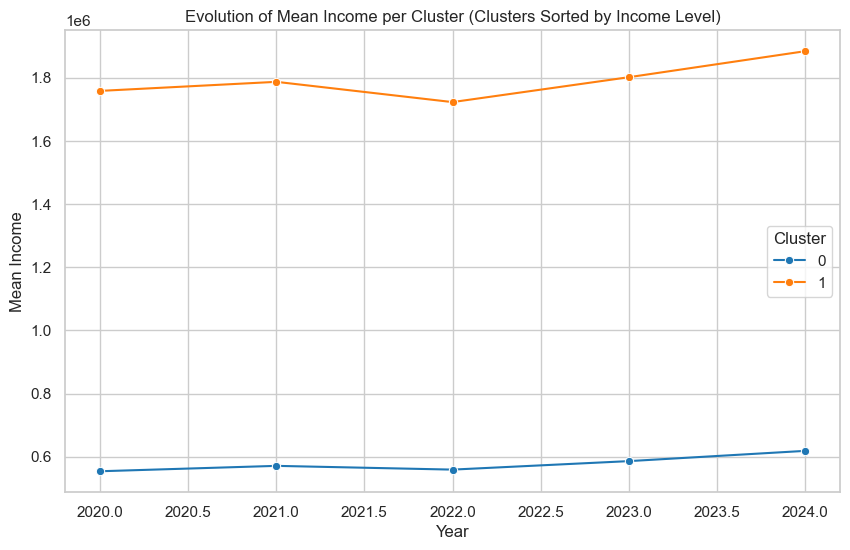

In [212]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=cluster_summary,
    x='year',
    y='mean_income',
    hue='cluster',
    marker='o'
)
plt.title('Evolution of Mean Income per Cluster (Clusters Sorted by Income Level)')
plt.xlabel('Year')
plt.ylabel('Mean Income')
plt.legend(title='Cluster')
plt.show()

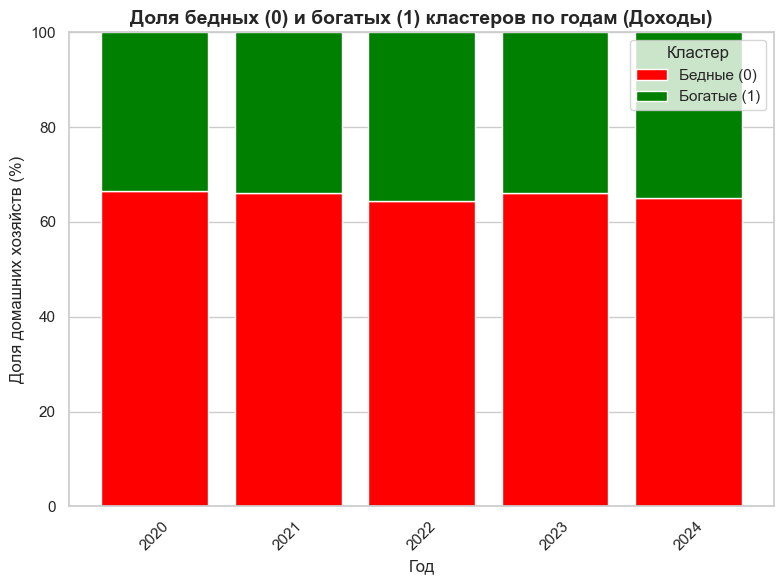

In [217]:
cluster_summary['share_households'] = (
    cluster_summary['n_households'] /
    cluster_summary.groupby('year')['n_households'].transform('sum')
)

share_df = (
    cluster_summary
    .pivot(index='year', columns='cluster', values='n_households')
    .fillna(0)
)
share_df = share_df.div(share_df.sum(axis=1), axis=0) * 100  # convert to %
share_df = share_df.rename(columns={0: 'Бедные (0)', 1: 'Богатые (1)'})  # rename for labels

# 2. Plot stacked bars
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(share_df.index, share_df['Бедные (0)'], color='red', label='Бедные (0)')
ax.bar(share_df.index, share_df['Богатые (1)'], bottom=share_df['Бедные (0)'],
    color='green', label='Богатые (1)')

# 3. Add titles and labels
ax.set_title('Доля бедных (0) и богатых (1) кластеров по годам (Доходы)', fontsize=14, fontweight='bold')
ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Доля домашних хозяйств (%)', fontsize=12)
ax.legend(title='Кластер', loc='upper right')
ax.set_ylim(0, 100)

# 4. Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [215]:
(550*0.6 + 1800*0.4)/4

262.5

In [218]:
data008 = pd.read_csv("/Users/zhanissatayev/Downloads/aggregated_D008.csv")
data008.head(20)

,Unnamed: 0,year,household_code,number_of_members,avg_age,min_birth_year,max_birth_year,avg_height,males,avg_education_level,active_members,inactive_members,marital_status_mode,territory_mode,residence_mode
0,0,2020,61,8.000000,43.000000,1982.0,1982.0,153.000000,0,5.0,1,0,2.0,11,2
1,1,2020,100,6.000000,23.000000,1990.0,2014.0,172.500000,1,4.0,1,1,2.0,15,1
2,2,2020,104,6.400000,47.200000,1955.0,2019.0,150.200000,1,4.0,2,3,2.0,11,2
3,3,2020,125,5.000000,21.000000,2004.0,2004.0,149.000000,0,5.0,0,1,3.0,11,2
4,4,2020,129,6.000000,19.000000,2006.0,2006.0,155.000000,1,2.0,0,1,NaN,11,1
5,5,2020,151,4.666667,32.666667,1982.0,2004.0,135.000000,2,2.0,2,1,2.0,15,2
6,6,2020,168,5.000000,36.000000,1989.0,1989.0,133.000000,0,3.0,1,0,1.0,15,1
7,7,2020,199,4.000000,60.000000,1965.0,1965.0,116.000000,1,2.0,0,1,NaN,11,2
8,8,2020,208,6.333333,35.000000,1969.0,2020.0,149.666667,0,2.0,1,2,1.0,11,2
9,9,2020,222,4.500000,26.000000,1990.0,2008.0,156.000000,1,3.0,2,0,1.0,11,2


In [219]:
data008.shape

(55547, 15)

In [221]:
55547/5

11109.4

In [220]:
data11_unique.shape

(263077, 32)

In [ ]:
data11_char = data11_unique.merge(data008[])